<h1>Wave Field Reconstruction Exploration with microSWIFTS</h1>
Written By: EJ Rainville, Fall 2021

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal
%matplotlib widget


(600, 1000)


/var/folders/tj/6lfp4z413tg03k2fzx57134c0000gn/T/ipykernel_12540/871985604.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  map = ax1.pcolor(x_grid, y_grid, eta)


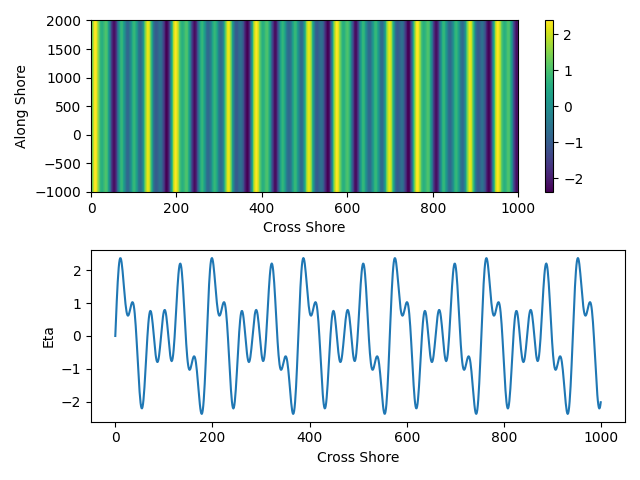

In [31]:
# Make Grid for reconstruction
x = np.linspace(0, 1000, num=1000)
y = np.linspace(-1000, 2000, num=600)
x_grid, y_grid = np.meshgrid(x, y, indexing='xy')
print(x_grid.shape)

# Make ocean surface function that will be "sampled" at each grid point 
# Long period component - Swell waves
period_1 = 15 # period in seconds 
freq_1 = 1/period_1
component_1 = np.sin(freq_1 * x_grid)

# Middle Component
period_2 = 10 # period in seconds 
freq_2= 1/period_2
component_2 = np.sin(freq_2 * x_grid)

# Short Period Component - Wind waves
period_3 = 5 # period in seconds 
freq_3= 1/period_3
component_3 = np.sin(freq_3 * x_grid)

# Total Surface
eta = component_1 + component_2 + component_3

# Plot the Ocean Surface function 
fig_surface, (ax1, ax2) = plt.subplots(2)
# Plot surface contour map
map = ax1.pcolor(x_grid, y_grid, eta)
ax1.set_xlabel('Cross Shore')
ax1.set_ylabel('Along Shore')
fig_surface.colorbar(map, ax=ax1)

# Plot surface transect
ax2.plot(eta[0,:])
ax2.set_xlabel('Cross Shore')
ax2.set_ylabel('Eta')

# Figure Properties
plt.tight_layout()
